### Machine Learning Algorithm:
___

* from **IBM corporation Course by:(Sr.Data Scientist Saeed Aghabozorgi)**
* coding by: **(Ahmad Ahmadi)**
___
### 3) Polynomial Regression:

* **regression:** is the process of predicting a continuous value.
* the key point in regression is, our dependent value should be continuous. however; the independent variable can be measured on either categorical or continuous measurment scale.

- sometimes the trend of is **not linear.** in this case we can use **Polynomial Regression methods.**
- In fact, we can use polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an **nth degree polynomial in x**
- like: $$ \hat y = b + coef_1  x + coef_2 x^2$$
<br> * $ \hat y$ = predicted output by Regression methods.

___

In [1]:
# importing packages we need here:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# fit's a function that renders figures in a notebook (instead of displaying it in a new window as an object):
%matplotlib inline

In [2]:
# reading data:
data = pd.read_excel('fuel_consump.xlsx')
# take a look at 5 rows of data:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


___
*  **if you want to see statistical features of this data set you can use <u>DataFrame.describe()**
<br> **these features are:**
* count
* mean
* std = standard deviation
* median = 50 %
* quartiles = 25% , 75%
* min
* max
___

In [3]:
# statistical features using describe():
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


___
* at this stage, we can select our probable **input / output** features from data above:
___

In [4]:
# feature selection:
features_data = data [['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
# visualizing:
features_data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


* it's better to plot these features to have a clear intuition about them:

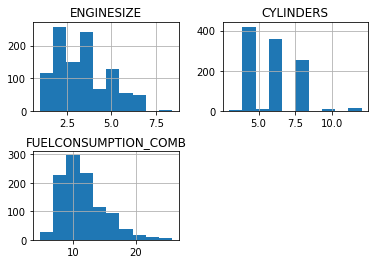

In [5]:
visualizing = data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
# histogram plot:
visualizing.hist()
plt.subplots_adjust(hspace=0.45)
plt.show()

* to find the trend of these features corresponds to **'CO2 EMISSIONS'**, we can plot them.

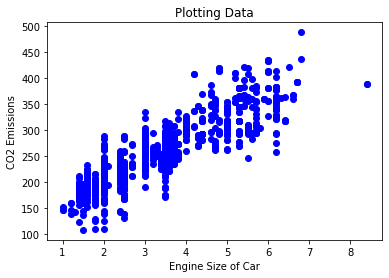

In [6]:
# plots:
plt.scatter(features_data.ENGINESIZE, features_data.CO2EMISSIONS, color='blue')
plt.title('Plotting Data')
plt.xlabel('Engine Size of Car')
plt.ylabel('CO2 Emissions')
plt.show()

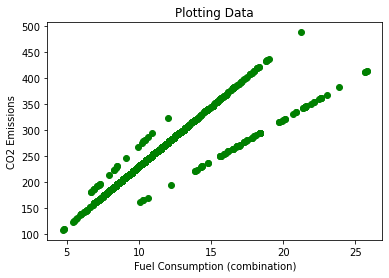

In [7]:
# plots:
plt.scatter(features_data.FUELCONSUMPTION_COMB, features_data.CO2EMISSIONS, color='green')
plt.title('Plotting Data')
plt.xlabel('Fuel Consumption (combination)')
plt.ylabel('CO2 Emissions')
plt.show()

___
* before starting to create our  Polynomial regression, we need to split our data to **Train and Test sets.**
* there are **two ways** to do train/test split:
<br>1) using sklearn library: -- **form sklearn.model_selection import train_test_split()**
<br>2) you can create a **mask** to do so.
___

In [8]:
# creating a mask to split data to train / test:
# seed(1) = make a fixed random number for each run of this cell:
np.random.seed(1)
mask = np.random.rand(len(features_data)) < 0.8
train_data = features_data[mask]
test_data = features_data[~mask]


___

* now, we are ready to create our own **Polynomial regresison** using sklearn (scikit learn) library.
___

**PolynomialFeatures()** function in **Scikit-learn library,** drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the **specified degree**(here: degree=2). For example, lets say the original feature set has only one feature, *ENGINESIZE*. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, **degree=0, degree=1 and degree=2:*
___
___

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

The equation and the sample example is displayed below.

$$
\begin{bmatrix}
v_1\\\\
v_2\\\\
\vdots\\\\
v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
[ 1 & v\_1 & v\_1^2]\\\\
[ 1 & v\_2 & v\_2^2]\\\\
\vdots & \vdots & \vdots\\\\
[ 1 & v_n & v_n^2]
\end{bmatrix}
$$

$$
\begin{bmatrix}
2.\\\\
2.4\\\\
1.5\\\\
\vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
[ 1 & 2. & 4.]\\\\
[ 1 & 2.4 & 5.76]\\\\
[ 1 & 1.5 & 2.25]\\\\
\vdots & \vdots & \vdots\\\\
\end{bmatrix}
$$

___
___

In [9]:
# creating Polynomial Regression Model:
from sklearn.preprocessing import PolynomialFeatures

x_train = train_data[['ENGINESIZE']].to_numpy()
y_train = train_data[['CO2EMISSIONS']].to_numpy()

x_test = test_data[['ENGINESIZE']].to_numpy()
y_test = test_data[['CO2EMISSIONS']].to_numpy()

poly_feat = PolynomialFeatures(degree=2)

x_train_poly = poly_feat.fit_transform(x_train)
x_test_poly = poly_feat.fit_transform(x_test)

print('befor:\n')
print(x_train[:5, ])
print('after:\n')
print(x_train_poly[5:, :])
print('_____________\n')
print('old shape', x_train.shape,'=>','new shape', x_train_poly.shape )
print('_____________')

befor:

[[2. ]
 [2.4]
 [1.5]
 [3.5]
 [3.5]]
after:

[[ 1.    3.5  12.25]
 [ 1.    3.5  12.25]
 [ 1.    3.7  13.69]
 ...
 [ 1.    3.    9.  ]
 [ 1.    3.2  10.24]
 [ 1.    3.2  10.24]]
_____________

old shape (856, 1) => new shape (856, 3)
_____________


___

- **now, we shoul apply Linear Model on Polynomial Features:**
___

In [10]:
# applying Linear Model on Polynomial Features:
from sklearn import linear_model
linear_reg_model = linear_model.LinearRegression()
y_hat =linear_reg_model.fit(x_train_poly, y_train)

# save coefficients, intercept in the bottom variable:
coefficients = linear_reg_model.coef_
intercept = linear_reg_model.intercept_

# pritint output:
for i in range(3):
    print('coef(',i, ') =', coefficients[0, i])
print('intercept =', intercept[0], '\n')
print('y_hat = coef(1) * x + coef(2) * x^2 + intercept')

coef( 0 ) = 0.0
coef( 1 ) = 50.24251677668247
coef( 2 ) = -1.4581683721103218
intercept = 107.66692273480743 

y_hat = coef(1) * x + coef(2) * x^2 + intercept


___
- now we have our **Polynomial Regression Model:**
$$ \hat y = b + coef_1  x + coef_2 x^2$$
<br> *$ \hat y$ = predicted output by Regression methods.
___

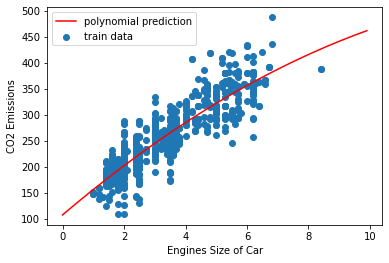

In [11]:
# plotting results:
plt.scatter(train_data.ENGINESIZE, train_data.CO2EMISSIONS)
x_sample = np.arange(0.0, 10.0, 0.1)
y_sample = coefficients[0, 1]*x_sample + coefficients[0, 2]* np.power(x_sample, 2) + intercept[0]
plt.plot(x_sample, y_sample, 'r')
plt.legend(['polynomial prediction', 'train data'])
plt.xlabel('Engines Size of Car')
plt.ylabel('CO2 Emissions')
plt.show()

___

* to find out the **accuracy of our model**, we can use **Mean Absolute Error**, **Mean Square Error**, **R2_score.**


* **Mean Absolute Error (MAE)**
$$MAE =\sum_{i}^{n}\left\lvert\frac{y_p^{(i)} - y_t^{(i)}}{n}\right\rvert$$
* **Mean Square Error (MSE)** 
$$ MSE = \sum_{i}^{n}\frac{(y_p^{(i)} - y_t^{(i)})^2}{n}$$
* **R2_score** 
$$ R2\,score = 1 - \frac{RSS^{*}}{TSS^{*}}$$
 <br> * RSS = Residual Sum of Squares
<br> * TSS = Total Sum of Squares
___

In [12]:
# evaluation of the model:
from sklearn.metrics import r2_score

x_test = np.asarray(test_data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y_test = np.asarray(test_data[['CO2EMISSIONS']])
y_hat_test = linear_reg_model.predict(x_test_poly)

print('Mean Absolute Error: %.2f' % np.mean(np.absolute(y_hat_test - y_test)))
print('Mean Square Error: %.2f' % np.mean(np.square(y_hat_test - y_test)))
print('R2_score: %.2f' % r2_score(y_hat_test, y_test))

Mean Absolute Error: 23.03
Mean Square Error: 924.65
R2_score: 0.71


___

* Hint:
* **%.2f** is used to reduce the accuracy of calculations up to 2 decimal places. **f = float**, **.2 = up to (2) decimal places.**
___